## Задача 1.2. Точки (Р-модель распознавания)

### Постановка задачи
Пусть образы объектов описываются группами из двух целочисленных
параметров $(x, y)$. Имеется два непересекающихся класса объектов. Требуется провести границу между классами. Способ построения разграничивающей прямой предлагается разработать самостоятельно.

### Исходные данные
Два натуральных числа $N_1$ – количество образцов из первого класса и $N_2$ – количество образцов из второго класса. $N1 + N2$ пар чисел $(x_k, y_k)$ для образцов из первого и второго классов.

Требуется выполнить графическую иллюстрацию Р-модели

> Замечание.
> 
> Точки разных классов могут задаваться пользователем произвольно
или генерироваться автоматически.
Для автоматического формирования наборов точек $(x_k, y_k)$ каждого класса следует воспользоваться следующей информацией. Пусть в пространстве признаков $R^2$ заданы два нормальных распределения с математическими  жиданиями $(Mx_1, My_1)$ и $(Mx_2, My_2)$ и дисперсиями $σ_1$ и $σ_2$.
> 
> Каждое из распределений задает один из классов объектов. Производится случайный выбор точек (объектов) и разыгрывается по заданным законам класс, в который они зачисляются. После того, как определены $N_1 + N_2$
объектов, считаем, что исходная информация задана.
>
> Таким образом, при разработке программы следует предусмотреть ввод
пользователем величин $N_1$, $N_2$, $Mx_1$, $My_1$, $Mx_2$, $My_2$, $σ_1$ и $σ_2$.

Работу выполнил: студент группы ПИИ(м)-21, Латынцев А.В.

http://mathprofi.ru/uravnenie_pryamoi_na_ploskosti.html



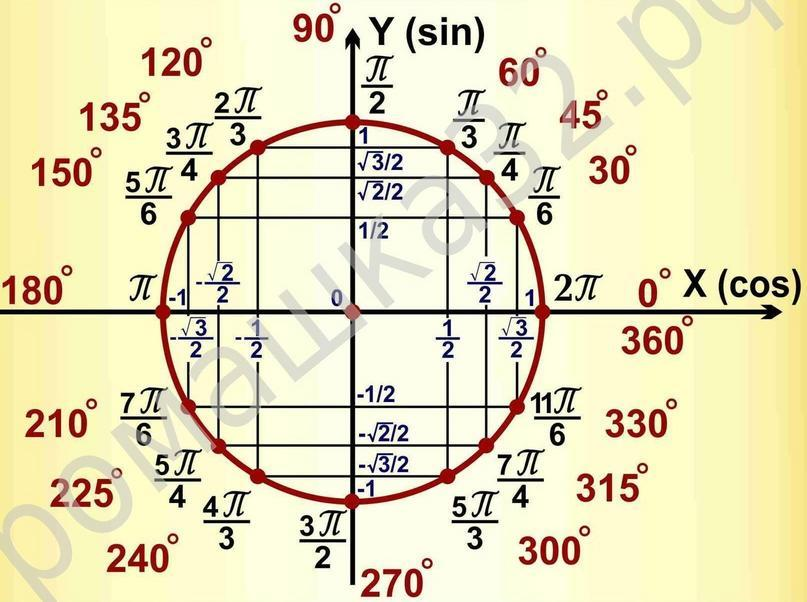

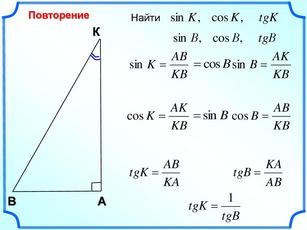

In [6]:
# Подключаем необходимые пакеты
import scipy.stats as sps  # 1.9.2
import numpy as np  # 1.23.4
import ipywidgets as widgets  # 8.0.2
import matplotlib.pyplot as plt  # 3.6.1
import matplotlib.lines as mlines
from sklearn import svm  # 1.1.2
from sklearn.linear_model import LogisticRegression
from math import cos, pi, sin, asin, acos, atan, tan, sqrt, degrees
# использовать системное приложение для взаимодействия с графиками
# в моем случае - TkAgg
%matplotlib

def grad_to_rad(grad):
    return grad/360*pi*2

Using matplotlib backend: TkAgg


In [7]:
# класс для создания объектов 2-мерного нормального распределения
class norm_distribution:
    def __init__(self, N: int, math_exp: list, cov_m: list):
        """
        N: кол-во образцов из первого класса
        math_exp: математическое ожидание [Mx1, My1]
        cov: ковариацион. матрица распределения
             [[variance_x, 0], [0, variance_y]]
        """
        
        self.math_exp = math_exp
        self.cov_m = cov_m
        
        # Объект нормального распределения
        self.norm_distribution = \
            sps.multivariate_normal(mean=math_exp, cov=cov_m)
        
        self.points = \
            self.norm_distribution.rvs(size=N) # наши N точки
    
    def poly_f(self):
        fit = np.polyfit(self.points[:,0], self.points[:,1], 3)
        return fit
    
    # Метод для ручного добавления точек
    def add_point(self, x, y):
        self.points = list(self.points)
        self.points.append(np.array([x, y]))
        self.points = np.array(self.points)

    # Вернуть значение функции плотности вероятности для точек
    # (по факту считается очень маленький интервал)
    def return_probability(self, x, y):
        return self.norm_distribution.pdf(np.array([x,y]))

In [8]:
class distribution_analysis:
    def __init__(self, object_1, object_2, graph_title: str):
        """
        object_1 и object_2 - экземпляры класса norm_distribution
        """
        self.object_1, self.object_2 = object_1, object_2
        
        # Построение Координатной плоскости облака образов
        fig, self.ax = plt.subplots(
            figsize=(10, 10), 
            num=graph_title
        )
        self.initialization_of_graph()
        
    def plot_everything(self, show: bool):
        self.add_norm_points_on_graph()
        self.add_connect_centers_line()
        self.add_hyperplane(self.get_points_of_hyperplane(obj=self.object_1), line_color='#001B33')
        #self.add_hyperplane(self.get_points_of_hyperplane(obj=self.object_2), line_color='#001B33')
        
        if show:
            self.ax.plot()
        
       
    def initialization_of_graph(self):
        self.ax.set_aspect('equal', adjustable='box')
        
        # Удаление верхней и правой границ
        self.ax.spines['top'].set_visible(False)
        self.ax.spines['left'].set_visible(False)
        self.ax.spines['right'].set_visible(False)
        
        # Добавление основных линий сетки
        self.ax.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)
        
        
    
    def add_norm_points_on_graph(self, points_color_1='#454FA1', points_color_2='#E01A2D'):
        self.ax.scatter(
            np.array(list(map(lambda value: value[0], self.object_2.points))), 
            np.array(list(map(lambda value: value[1], self.object_2.points))), 
            color=points_color_2
        )  # x2, y2
        
        self.ax.scatter(
            np.array(list(map(lambda value: value[0], self.object_1.points))), 
            np.array(list(map(lambda value: value[1], self.object_1.points))),
            color=points_color_1
        )
 
    def add_connect_centers_line(self): 
        # для удобства
        x1_m, y1_m = self.object_1.math_exp[0], self.object_1.math_exp[1]
        x2_m, y2_m = self.object_2.math_exp[0], self.object_2.math_exp[1]
        
        lM = mlines.Line2D(
            [x1_m, x2_m], [y1_m, y2_m], 
            color="#000", linestyle="--", marker="x"
        )
        self.ax.add_line(lM)

        self.ax.annotate(f'({x1_m}; {y1_m})',
                    (x1_m, y1_m),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    color='blue', backgroundcolor="#eae1e196")
        self.ax.annotate(f'({x2_m}; {y2_m})',
                    (x2_m, y2_m),
                    textcoords="offset points",
                    xytext=(0, 10),
                    ha='center',
                    color='blue', backgroundcolor="#eae1e196")
    
    def get_points_of_hyperplane(self, obj, margin_of_error=0.0005):
        x_1, y_1 = self.object_1.math_exp
        x_2, y_2 = self.object_2.math_exp
        mid_x = (x_1 + x_2)/2
        mid_y = (y_1 + y_2)/2
        self.ax.scatter([ [mid_x] ], [ mid_y ], color='#FDB94D')
        
        # y = kx + b
        k = lambda p_1, p_2: (p_2[1] - p_1[1]) / (p_2[0] - p_1[0])  # p_N = x_n, y_n;                                                          # p_2 = x_2, y_2;
        b = lambda p_1, p_2: (p_1[1] * p_2[0] - p_1[0] * p_2[1] ) / (p_2[0] - p_1[0])
        ang = lambda a: degrees(atan(a))
        
        k_1 = k(self.object_1.math_exp, self.object_2.math_exp)
        b_1 = b(self.object_1.math_exp, self.object_2.math_exp)
        ang_1 = ang(k_1)
        print(f"y = {round(k_1, 3)} * x + {b_1} \nang = {ang_1}\n")
        
        # new_x, new_y
        x = lambda grad: cos(grad_to_rad(grad))  + mid_x
        y = lambda grad: sin(grad_to_rad(grad))  + mid_y
        normal_ang = 90 + ang_1
        normal_x = x(normal_ang)
        normal_y = y(normal_ang)
        self.ax.scatter([ [normal_x] ], [ [normal_y] ], color='#FDB94D')
        self.ax.set_aspect('equal', adjustable='box')
        
        # y = kx + b
        k_2 = k( (mid_x, mid_y), (normal_x, normal_y) )
        b_2 = b( (mid_x, mid_y), (normal_x, normal_y) )
        ang_2 = ang(k_2)
        print(f"y = {round(k_2, 3)} * x + {b_2} \nang = {ang_2}, normal_ang = {normal_ang}")
        print(f"???:\n\
        abs(ang_2) + abs(normal_ang) = abs({round(ang_2, 2)}) + abs({round(normal_ang, 2)}) = {abs(ang_2) + abs(normal_ang)}")
        
        # далее пробегаемся по всем точкам и ищем самую удаленную
        # -X и +Y будут вносить вклад слева (А НАКЛОН?)
        # +X и -Y будут вносить вклад справа (А НАКЛОН?)
        # P.S. Где именно - слева или справа - видимо зависит от наклона: > или < 45 градусов?!
        
        # После нахождения - бросаем перпендикуляр
        #   и по уравнению пересечения прямых находим координаты границы
        
        
        return [[[0], [0]]]
        #return [[[0],[0]], [[obj.math_exp[0]], [obj.math_exp[1]]]]

    
    def add_hyperplane(self, points, line_color="#00A65D"):
        """
        points - результат работы метода get_points_of_hyperplane
        """
        x_points, y_points = \
            np.array(list(map(lambda value: value[0], points))), \
            np.array(list(map(lambda value: value[1], points)))
        
        # self.ax.scatter(x_points, y_points, color=line_color)
        
        for i in range(1, len(points), 1): 
            self.ax.add_line(
                mlines.Line2D(
                    [x_points[i-1], x_points[i]], 
                    [y_points[i-1], y_points[i]], 
                    color=line_color, 
                    marker="x")
            )

        
        

In [9]:
if __name__ == "__main__":
    
    # Создаем два "облака"
    cloud_1 = norm_distribution(
        N=5, 
        math_exp=[1, 1], 
        #cov_m=[[1, 0], [0, 1]]
        cov_m=[[11, 0], [0, 11]]
    )
    
    cloud_2 = norm_distribution(
        N=2, 
        math_exp=[3, 5],
        cov_m=[[10, 0], [0, 10]]
    )

    
    # cloud_1.show_3d_plot_of_distribution()
    

In [10]:
    # Инициализация сравнения двух "облаков"
    cloud_comparison = distribution_analysis(
        cloud_1, cloud_2, graph_title='Облака образов'
    )
    # Построение и отображение графика
    cloud_comparison.plot_everything(show=True)

y = 2.0 * x + -1.0 
ang = 63.43494882292201

y = -0.5 * x + 4.0 
ang = -26.565051177077986, normal_ang = 153.43494882292202
???:
        abs(ang_2) + abs(normal_ang) = abs(-26.57) + abs(153.43) = 180.0
